In [1]:
import pickle
import matplotlib.pyplot as plt
import torchvision
import torch

In [10]:
model_name = "MNIST_MLP"
optimizer_name = "Adam"
dataset_name = "MNIST"
loss_fn_name = "CrossEntropyLoss"
lr = 0.001
momentum = 0.0
batch_size_min = 5
batch_size_max = 13
target_acc = 0.97
nb_file = 0

In [15]:
hyperoptimization = 0
name_file = "results/" + model_name + "_" + optimizer_name + "_" + dataset_name + "_" + loss_fn_name + "_" + str(lr) + "_" + str(momentum) + "_" + str(hyperoptimization) +  "_" + str(batch_size_min) + "_" + str(batch_size_max) + "_" + str(target_acc) + "_" + str(nb_file) + ".pkl"


with open(name_file, 'rb') as f:
    steps_normal, times_normal = pickle.load(f)

In [16]:
hyperoptimization = 1
name_file = "results/" + model_name + "_" + optimizer_name + "_" + dataset_name + "_" + loss_fn_name + "_" + str(lr) + "_" + str(momentum) + "_" + str(hyperoptimization) +  "_" + str(batch_size_min) + "_" + str(batch_size_max) + "_" + str(target_acc) + "_" + str(nb_file) + ".pkl"


with open(name_file, 'rb') as f:
    steps_hyperopt, times_hyperopt = pickle.load(f)

In [17]:
print(steps_hyperopt)

[13875.0, 9374.7, 4030.9, 2155.9, 1323.6, 831.6, 623.5, 534.1, 548.9]


In [18]:
batch_sizes = [2**x for x in range(batch_size_min, batch_size_max + 1)]

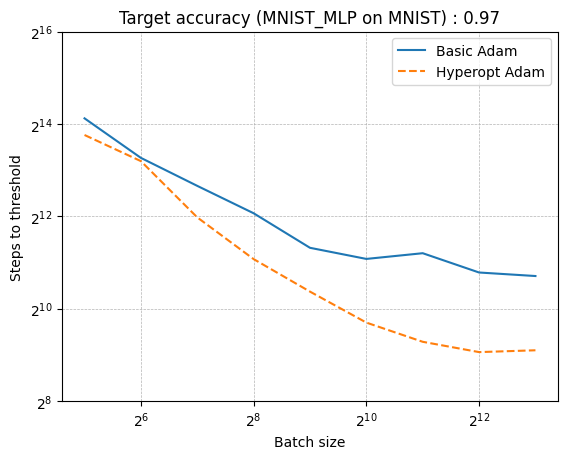

In [23]:
# Créer la figure et les axes
fig, ax = plt.subplots()

# Tracer les courbes
ax.plot(batch_sizes, steps_normal, label="Basic " + optimizer_name)
ax.plot(batch_sizes, steps_hyperopt, label="Hyperopt "+optimizer_name, linestyle="--")

# Ajouter les légendes, les titres et les échelles
ax.legend()
ax.set_title("Target accuracy ({} on {}) : {}".format(model_name, dataset_name, str(target_acc)))
ax.set_xlabel("Batch size")
ax.set_ylabel("Steps to threshold")
ax.set_xscale("log", base=2)
ax.set_yscale("log", base=2)

# Ajouter le quadrillage
ax.grid(True, which="both", ls="--", lw=0.5, color="0.7")

# Définir les limites de l'axe y
ax.set_ylim([2**8, 2**16])

# Afficher la figure
plt.show()

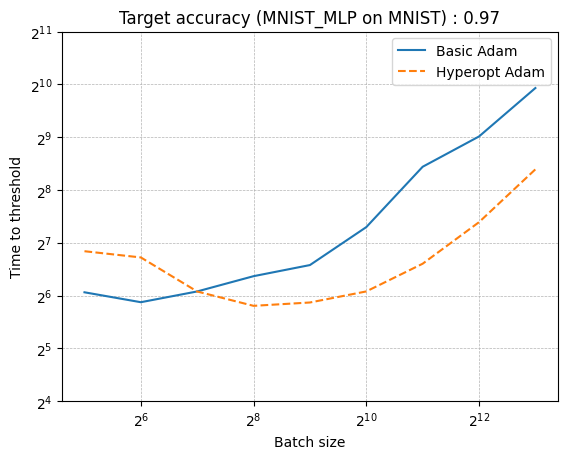

In [35]:
# Créer la figure et les axes
fig, ax = plt.subplots()

# Tracer les courbes
ax.plot(batch_sizes, times_normal, label="Basic " + optimizer_name)
ax.plot(batch_sizes, times_hyperopt, label="Hyperopt "+optimizer_name, linestyle="--")

# Ajouter les légendes, les titres et les échelles
ax.legend()
ax.set_title("Target accuracy ({} on {}) : {}".format(model_name, dataset_name, str(target_acc)))
ax.set_xlabel("Batch size")
ax.set_ylabel("Time to threshold")
ax.set_xscale("log", base=2)
ax.set_yscale("log", base=2)

# Ajouter le quadrillage
ax.grid(True, which="both", ls="--", lw=0.5, color="0.7")

# Définir les limites de l'axe y
ax.set_ylim([2**4, 2**11])

# Afficher la figure
plt.show()

In [24]:
print(steps_normal[3]-steps_normal[6])
print(steps_hyperopt[3]-steps_hyperopt[6])

1933.6
1532.4


In [25]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=torchvision.transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=2**batch_size_max, shuffle=True)
N = len(train_loader.dataset)

In [26]:
print(N)

60000


In [27]:
# Steps * batch_sizes
epoch_normal = [x * y / N for x, y in zip(steps_normal, batch_sizes)]
epoch_hyperopt = [x * y / N  for x, y in zip(steps_hyperopt, batch_sizes)]

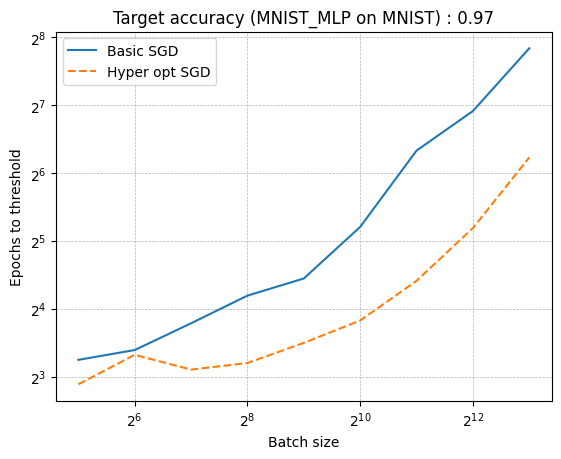

In [28]:
# Créer la figure et les axes
fig, ax = plt.subplots()

# Tracer les courbes
ax.plot(batch_sizes, epoch_normal, label="Basic SGD")
ax.plot(batch_sizes, epoch_hyperopt, label="Hyper opt SGD", linestyle="--")

# Ajouter les légendes, les titres et les échelles
ax.legend()
ax.set_title("Target accuracy ({} on {}) : {}".format(model_name, dataset_name, str(target_acc)))
ax.set_xlabel("Batch size")
ax.set_ylabel("Epochs to threshold")

# Ajouter le quadrillage
ax.grid(True, which="both", ls="--", lw=0.5, color="0.7")

ax.set_xscale("log", base=2)
ax.set_yscale("log", base=2)


# Définir les limites de l'axe y
#ax.set_ylim([2**0, 2**16])

# Afficher la figure
plt.show()

In [29]:
def pente(list, i,j):
    return (list[j] - list[i]) / (j-i)

print(pente(steps_normal, 2, 4))
print(pente(steps_hyperopt, 2, 4))

-1957.0500000000002
-1353.65


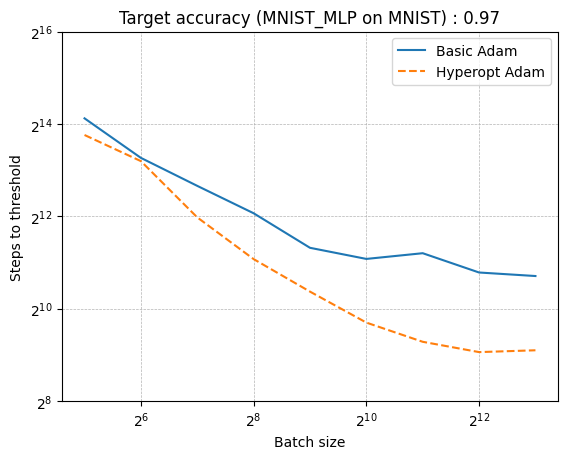

In [31]:
# Créer la figure et les axes
fig, ax = plt.subplots()

# Tracer les courbes
ax.plot(batch_sizes, steps_normal, label="Basic " + optimizer_name)
ax.plot(batch_sizes, steps_hyperopt, label="Hyperopt "+optimizer_name, linestyle="--")

# Ajouter les légendes, les titres et les échelles
ax.legend()
ax.set_title("Target accuracy ({} on {}) : {}".format(model_name, dataset_name, str(target_acc)))
ax.set_xlabel("Batch size")
ax.set_ylabel("Steps to threshold")
ax.set_xscale("log", base=2)
ax.set_yscale("log", base=2)

# Ajouter le quadrillage
ax.grid(True, which="both", ls="--", lw=0.5, color="0.7")

# Définir les limites de l'axe y
ax.set_ylim([2**8, 2**16])

# Afficher la figure
plt.show()